# Creating Presentable Visualizations With Matplotlib



Data visualizations are an important tool for communicating data-driven insights. A strong insight paired with an appropriately formatted visauzliation can resonate with an audience far beyond what a raw data table is capable of. The importance of visualizations is increased when communicating insights beyond the data science community. 

There are myriad routes to creating compelling visualizations and entire texts dedicated to it. However, the rules of thumb articulated by Eugene Wei have stuck with me over time: 

- Place data labels inline whenever possible (avoid legends)
- Match the data's color and label
- Label x and y axes with a description 
- Include units in the x and y axis tick labels
- Adopt a descriptive title for the chart
- Avoid non-zero y-axis minimums
- Create high color contrast to draw attention to data
- Ensure it is easy to compare across data sets

I would add a final rule of thumb for the age of Twitter and virality: A visualization should be capable of standing alone. 

What I mean by this is that a twitter user who sees nothing more than a screenshot of the visualization should be able to correctly interpret the visualization. 

In this article, I will focus on creating presentable bar charts. To do so, I will utilize the following tools: python, Pandas, and Matplotlib.

## Getting Ready: Importing and preparing our dataset

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

## The bar chart

In [10]:
top_guests = df['Guest'].value_counts(ascending=False)[:10]

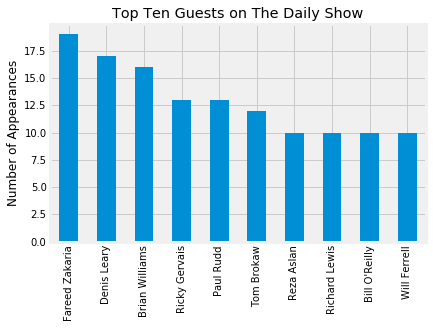

In [11]:
top_guests.plot.bar();
plt.title('Top Ten Guests on The Daily Show')
plt.ylabel('Number of Appearances')
plt.show()

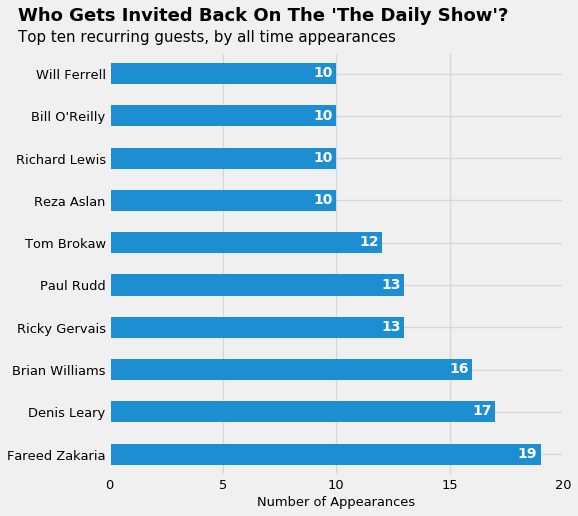

In [12]:
#Set plot style
plt.style.use('fivethirtyeight')

#Adjust figure size
fig, ax = plt.subplots(figsize=(7.25,7.25))

#Create bar chart
top_guests.plot.barh(ax=ax, 
                     color='#1d8ed2')

#Add title
ax.text(x=-4,
        y=10.25, 
        s="Who Gets Invited Back On The 'The Daily Show'?",
        fontsize=18,
        fontweight='bold');
ax.text(x=-4,
        y=9.75, 
        s="Top ten recurring guests, by all time appearances",
        fontsize=15,
        fontweight='normal');

#Adjust axes
ax.set(xticks=[0, 5, 10, 15, 20]
      )
ax.set_xticklabels( ["0", "5", "10", "15", "20"] )
ax.tick_params(axis='both', labelsize=13)
ax.set_xlabel('Number of Appearances', fontsize=13)

# Add labels to bars
for i, v in enumerate(top_guests):
    ax.text(v - 1, i-0.075, str(v), color='white', fontweight='bold')

# Adjust color of gridlines
ax.grid(alpha=0.7, linewidth=1.25)

# Show plot without extra output
plt.show();